In [122]:
'''
Mendeklarasikan library yang akan digunakan
'''

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from currency_converter import CurrencyConverter

In [123]:
'''
Membaca dataset yang telah dibersihkan pada homework_2
'''

dataset = pd.read_csv('dataset/clean_data_with_additional_cleaning.csv')

In [124]:
'''
Melihat informasi umum dari dataset
'''

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7270 entries, 0 to 7269
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7270 non-null   int64  
 1   jenis_kelamin  7270 non-null   object 
 2   pekerjaan      7270 non-null   object 
 3   gaji_idr       7270 non-null   float64
 4   is_menikah     7270 non-null   int64  
 5   berat_kg       7270 non-null   float64
 6   tinggi_cm      7270 non-null   float64
 7   is_merokok     7270 non-null   int64  
 8   pendidikan     7270 non-null   object 
 9   ever_stress    7270 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 568.1+ KB


In [125]:
'''
Membagi dataset menjadi dua bagian karena pengangguran bukan bagian dari pekerja
Dilakukan dikarenakan agar analisa pada sektor pekerja tidak terpengaruh oleh data pengangguran 
Dan mempermudah analisa pada data pengangguran
'''

# Membuat DataFrame 'dataset_no_worker' untuk data dengan pekerjaan 'Pengangguran' atau 'Tidak ingin memberitahu'
dataset_no_worker = dataset[dataset['pekerjaan'].isin(['Pengangguran'])]

# Membuat DataFrame 'dataset_worker' untuk data selain 'Pengangguran' dan 'Tidak ingin memberitahu'
dataset_worker = dataset[~dataset['pekerjaan'].isin(['Pengangguran'])]

# Menampilkan hasil
print("Dataset No Worker:")
print(dataset_no_worker)

print("\nDataset Worker:")
print(dataset_worker)

Dataset No Worker:
      umur jenis_kelamin     pekerjaan      gaji_idr  is_menikah   berat_kg  \
3       36     Perempuan  Pengangguran  3.624871e+06           1  51.539781   
18      38     Laki-laki  Pengangguran  1.087815e+07           1  53.103794   
24      29     Laki-laki  Pengangguran  4.157454e+06           1  49.140806   
105     37     Laki-laki  Pengangguran  7.094840e+06           1  63.307148   
107     21     Laki-laki  Pengangguran  7.225247e+06           1  53.542920   
...    ...           ...           ...           ...         ...        ...   
7155    44     Laki-laki  Pengangguran  4.485098e+06           1  58.756820   
7186    39     Laki-laki  Pengangguran  5.510586e+06           1  46.047490   
7205    28     Laki-laki  Pengangguran  5.683330e+06           1  55.308429   
7217    25     Laki-laki  Pengangguran  9.246093e+06           1  57.338785   
7237    32     Laki-laki  Pengangguran  1.063098e+07           1  43.074950   

       tinggi_cm  is_merokok pen

In [126]:
dataset.head()

,umur,jenis_kelamin,pekerjaan,gaji_idr,is_menikah,berat_kg,tinggi_cm,is_merokok,pendidikan,ever_stress
0,27,Perempuan,PNS,7957452.757,1,54.315053,170.428542,1,S1,1
1,53,Perempuan,PNS,7633002.755,1,72.873404,165.530097,0,S1,1
2,37,Perempuan,Pegawai swasta,6637624.864,1,46.321533,154.599388,0,S1,1
3,36,Perempuan,Pengangguran,3624871.391,1,51.539781,167.340481,1,SD,1
4,38,Laki-laki,Freelance,6031807.520,1,60.726909,165.514773,1,S2,0


### Function

In [127]:
'''
Membuat fungsi khusus untuk membuat visualisasi data dengan barplot agar membuat kode lebih terlihat efesien 
'''
def plot_barplot(data, x_col, y_col, title="", format_number="", x_label="", y_label="", colour_bar_set="1"):
    # Membuat palet warna berdasarkan mode colour_bar_set
    if colour_bar_set == "1":
        # Default: Tertinggi hijau, terendah merah
        norm = plt.Normalize(data[x_col].min(), data[x_col].max())
        sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
        colors = [sm.to_rgba(value) for value in data[x_col]]
    elif colour_bar_set == "2":
        # Kebalikan: Tertinggi merah, terendah hijau
        norm = plt.Normalize(data[x_col].min(), data[x_col].max())
        sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=norm)  # "_r" untuk membalikkan cmap
        colors = [sm.to_rgba(value) for value in data[x_col]]
    elif colour_bar_set == "3":
        # Semua bar berwarna biru
        colors = ["blue"] * len(data[x_col])
        sm = None  # Tidak perlu colorbar untuk mode ini
    else:
        raise ValueError("Invalid value for colour_bar_set. Choose '1', '2', or '3'.")

    # Membuat barplot dengan warna yang sesuai
    plt.figure(figsize=(10, 5))
    barplot = sns.barplot(
        x=x_col, 
        y=y_col,
        data=data,
        palette=colors
    )

    # Menambahkan nilai x_col di dalam bar
    for bar, value in zip(barplot.patches, data[x_col]):
        plt.text(
            bar.get_width() / 2,  # Posisi x (tengah bar)
            bar.get_y() + bar.get_height() / 2,  # Posisi y (tengah bar)
            f"{format_number}{int(value):,}",  # Format angka dengan pemisah ribuan
            va='center',  # Vertikal alignment
            ha='center',  # Horizontal alignment
            fontsize=10,  # Ukuran font
            color='white'  # Warna teks agar terlihat di dalam bar
        )

    # Menambahkan judul dan mengatur tampilan
    plt.title(title, loc="center", fontsize=15)
    plt.ylabel(f"{y_label}", fontsize=12)
    plt.xlabel(f"{x_label}", fontsize=12)
    plt.tick_params(axis='y', labelsize=12)

    # Menambahkan colorbar untuk mode 1 dan 2
    if colour_bar_set in ["1", "2"]:
        sm.set_array([])  # Mengatur array kosong untuk ScalarMappable
        cbar = plt.colorbar(sm, ax=plt.gca())  # Menentukan Axes untuk colorbar
        cbar.set_label(f"{x_col} ({format_number})", fontsize=12)

    plt.show()

In [128]:
'''
Membuat fungsi khusus untuk membuat visualisasi data dengan scatter plot agar membuat kode lebih terlihat efesien 
'''
def plot_scatter(data, x_col, y_col, title="Scatter Plot", x_label=None, y_label=None):
    # Membuat scatter plot
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        data[x_col], 
        data[y_col], 
        c=data[x_col],  # Warna berdasarkan nilai x_col
        cmap="coolwarm",  # Palet warna
        s=100,  # Ukuran marker
        edgecolor='k',  # Warna tepi marker
        alpha=0.8  # Transparansi marker
    )

    # Menambahkan judul dan label sumbu
    plt.title(title, fontsize=15)
    plt.xlabel(x_label if x_label else x_col, fontsize=12)
    plt.ylabel(y_label if y_label else y_col, fontsize=12)

    # Menambahkan colorbar untuk referensi
    cbar = plt.colorbar(scatter)  # Menggunakan scatter sebagai mappable
    cbar.set_label(f"{x_col}", fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

### 1.1 Pekerjaan apa yang memiliki gaji tertinggi dan terendah?

                 pekerjaan      gaji_idr
2           Pegawai swasta  7.850083e+06
3             Pengangguran  7.826045e+06
1                      PNS  7.820036e+06
0                Freelance  7.819778e+06
4  Tidak ingin memberitahu  7.312923e+06


/tmp/ipykernel_51274/2438731557.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


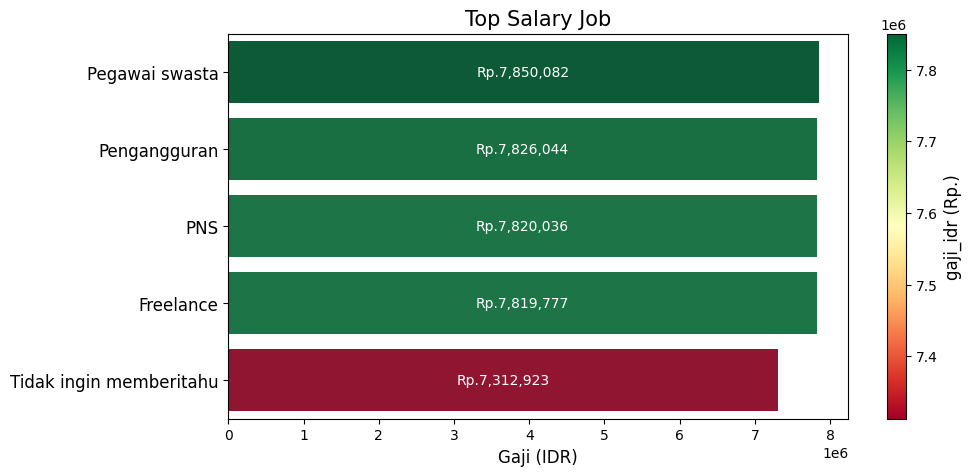

In [129]:
''' 
Menghitung rata-rata gaji berdasarkan pekerjaan
'''
median_salary_by_job = dataset.groupby('pekerjaan')['gaji_idr'].median().reset_index().sort_values(by='gaji_idr', ascending=False)
median_salary_by_job.columns = ['pekerjaan', 'gaji_idr']
print(median_salary_by_job)
plot_barplot(
    data=median_salary_by_job,
    x_col="gaji_idr",
    y_col="pekerjaan",
    title="Top Salary Job", 
    format_number="Rp.",
    x_label="Gaji (IDR)",
)

In [130]:
'''
Insight: Pegawai Swasta memiliki gaji tertinggi, diikuti oleh Pengangguran dan untuk Gaji Terendah adalah Pekerjaan Yang Tidak Diketahui dan Freelance. Ini menunjukkan 
'''

'\nInsight: Pegawai Swasta memiliki gaji tertinggi, diikuti oleh Pengangguran dan untuk Gaji Terendah adalah Pekerjaan Yang Tidak Diketahui dan Freelance. Ini menunjukkan \n'

### 1.2 Apakah Gaji Laki - Laki sama dengan Gaji Perempuan?

  jenis_kelamin      gaji_idr
1     Perempuan  7.853746e+06
0     Laki-laki  7.792794e+06


/tmp/ipykernel_51274/2438731557.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


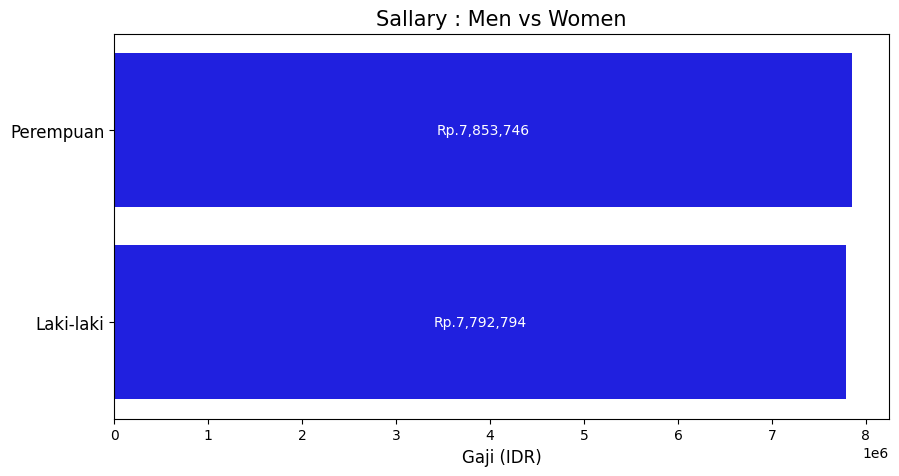

In [131]:
''' 
Menghitung rata-rata gaji berdasarkan jenis kelamin
'''
median_salary_by_gender = dataset.groupby('jenis_kelamin')['gaji_idr'].median().reset_index().sort_values(by='gaji_idr', ascending=False)
median_salary_by_gender.columns = ['jenis_kelamin', 'gaji_idr']
print(median_salary_by_gender)
plot_barplot(
    data=median_salary_by_gender,
    x_col="gaji_idr",
    y_col="jenis_kelamin", 
    title="Sallary : Men vs Women",
    format_number="Rp.",
    x_label="Gaji (IDR)",
    colour_bar_set='3',
)

In [132]:
''' 
Insight: terlihat Gaji rata-rata perempuan lebih sedikit tinggi dibandingkan laki - laki, tapi untuk untuk validasi perlu dilakukan perbandingan p_value dengan alpha yang mana sebesar 5%

Maka dari itu kita membuat 2 hipotesis sebagai berikut:
H0: Gaji laki-laki tidak sama dengan perempuan. Ada perbedaan signifikan.
H1: Gaji laki-laki adalah sama dengan perempuan. Tidak ada perbedaan signifikan.
'''

' \nInsight: terlihat Gaji rata-rata perempuan lebih sedikit tinggi dibandingkan laki - laki, tapi untuk untuk validasi perlu dilakukan perbandingan p_value dengan alpha yang mana sebesar 5%\n\nMaka dari itu kita membuat 2 hipotesis sebagai berikut:\nH0: Gaji laki-laki tidak sama dengan perempuan. Ada perbedaan signifikan.\nH1: Gaji laki-laki adalah sama dengan perempuan. Tidak ada perbedaan signifikan.\n'

In [133]:
gaji_laki2 = dataset[dataset.jenis_kelamin == "Laki-laki"][["jenis_kelamin","gaji_idr"]]
gaji_perempuan = dataset[dataset.jenis_kelamin == "Perempuan"][["jenis_kelamin","gaji_idr"]]

mean_laki2 = gaji_laki2['gaji_idr'].mean()
mean_perempuan = gaji_perempuan['gaji_idr'].mean()

t_statistic, p_value = stats.ttest_ind(a=gaji_laki2['gaji_idr'].values, b=gaji_perempuan['gaji_idr'].values, equal_var=False, alternative='greater')

alpha = 0.05

if p_value < alpha:
    print("\nKeputusan: P-value lebih kecil dari alpha. Tolak Hipotesis Nol. Gaji laki-laki tidak sama dengan perempuan. Ada perbedaan signifikan.")
else:
    print("\nKeputusan: P-value lebih besar dari alpha. Gagal menolak Hipotesis Nol. Gaji laki-laki adalah sama dengan perempuan. Tidak ada perbedaan signifikan.")


Keputusan: P-value lebih besar dari alpha. Gagal menolak Hipotesis Nol. Gaji laki-laki adalah sama dengan perempuan. Tidak ada perbedaan signifikan.


### 1.3 Apakah tingkatan umur mempengaruhi gaji seseorang?

In [134]:
''' 
Dilakukan corvert kurs IDR ke USD agar memudahkan analisa gaji dalam mata uang internasional dan dalam digit yang lebih sedikit 
dan dibulatkan menggunakan round(0) untuk menghilangkan desimal dan lebih mudah untuk dikelompokkan berdasarkan besaran gaji
'''

# Membuat instance CurrencyConverter
c = CurrencyConverter()

# Mendapatkan kurs IDR ke USD
idr_to_usd_rate = c.convert(1, 'IDR', 'USD')
usd_to_idr_rate = c.convert(1, 'USD', 'IDR')
print(f"Kurs USD ke IDR: {usd_to_idr_rate}")

# Menambahkan kolom 'gaji_usd' berdasarkan konversi dari 'gaji_idr'
dataset['gaji_usd'] = (dataset['gaji_idr'] * idr_to_usd_rate).round(0)

# Menampilkan dataset hasil konversi
print(dataset)

Kurs USD ke IDR: 16376.600308906814
      umur jenis_kelamin       pekerjaan      gaji_idr  is_menikah   berat_kg  \
0       27     Perempuan             PNS  7.957453e+06           1  54.315053   
1       53     Perempuan             PNS  7.633003e+06           1  72.873404   
2       37     Perempuan  Pegawai swasta  6.637625e+06           1  46.321533   
3       36     Perempuan    Pengangguran  3.624871e+06           1  51.539781   
4       38     Laki-laki       Freelance  6.031808e+06           1  60.726909   
...    ...           ...             ...           ...         ...        ...   
7265    52     Laki-laki             PNS  4.286318e+06           1  46.893444   
7266    45     Laki-laki             PNS  8.646146e+06           1  53.878714   
7267    24     Laki-laki             PNS  6.850066e+06           1  64.171294   
7268    29     Laki-laki  Pegawai swasta  1.204960e+07           1  55.217752   
7269    42     Perempuan  Pegawai swasta  4.888239e+06           1  52.69

    umur  gaji_usd
5     14     681.0
1     10     639.5
52    61     638.5
4     13     592.0
66    77     583.0
9     18     567.0
49    58     563.0
59    68     562.0
10    19     550.0
7     16     544.5
    umur  gaji_usd
54    63     411.0
53    62     407.0
58    67     406.0
50    59     405.5
60    69     398.0
2     11     353.5
63    73     350.0
0      8     318.0
61    70     269.5
65    75     237.0


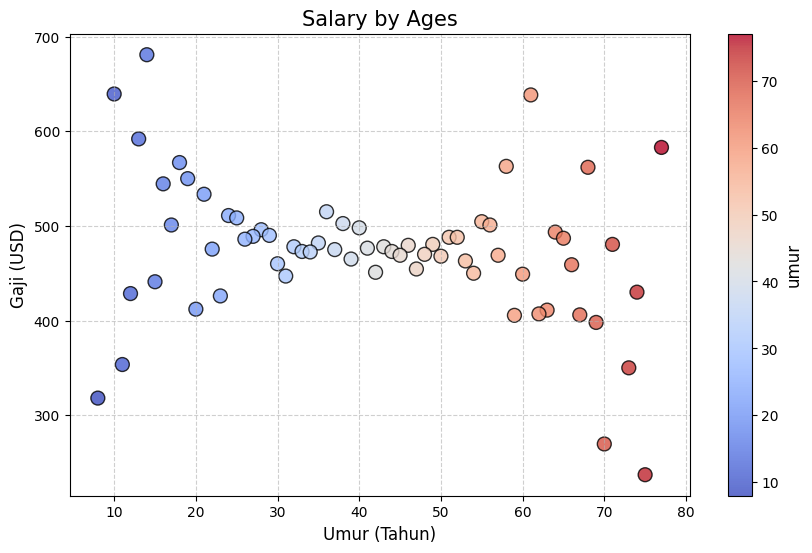

In [135]:
''' 
Membuat sort list dan visualisasi gaji berdasarkan usia
'''
median_salary_by_Ages = dataset.groupby('umur')['gaji_usd'].median().reset_index().sort_values(by='gaji_usd', ascending=False)
median_salary_by_Ages.columns = ['umur', 'gaji_usd']
print(median_salary_by_Ages.head(10))
print(median_salary_by_Ages.tail(10))
# Memanggil fungsi untuk membuat scatter plot
plot_scatter(
    data=median_salary_by_Ages,
    x_col="umur",
    y_col="gaji_usd",
    title="Salary by Ages",
    x_label="Umur (Tahun)",
    y_label="Gaji (USD)"
)

In [136]:
''' 
Insight:
Dari list di atas gaji tertinggi yaitu kelompok yang berumur 14 tahun, lalu disusul umur 10, 61, 13, 77 Tahun
Untuk Gaji terendah yaitu kelompok yang berumur 75 tahun, lalu disusul umur 70, 8, 73, 11 Tahun

Untuk hubungan gaji dengan umur ini menurut data yang sudah disediakan sangatlah beragam dan tidak ada pola yang jelas. 
Ini menunjukkan bahwa menurut data yang disediakan, gaji tidak dipengaruhi umur karena gaji tidak berbanding lurus dengan umur.
'''

' \nInsight:\nDari list di atas gaji tertinggi yaitu kelompok yang berumur 14 tahun, lalu disusul umur 10, 61, 13, 77 Tahun\nUntuk Gaji terendah yaitu kelompok yang berumur 75 tahun, lalu disusul umur 70, 8, 73, 11 Tahun\n\nUntuk hubungan gaji dengan umur ini menurut data yang sudah disediakan sangatlah beragam dan tidak ada pola yang jelas. \nIni menunjukkan bahwa menurut data yang disediakan, gaji tidak dipengaruhi umur karena gaji tidak berbanding lurus dengan umur.\n'

### 1.4 Apakah tingkatan pendidikan seseorang mempengaruhi gaji?

  pendidikan      gaji_idr
5        SMP  8.286630e+06
1         S2  8.005704e+06
4        SMA  7.782782e+06
0         S1  7.782453e+06
2         S3  7.644762e+06
3         SD  7.502332e+06


/tmp/ipykernel_51274/2438731557.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


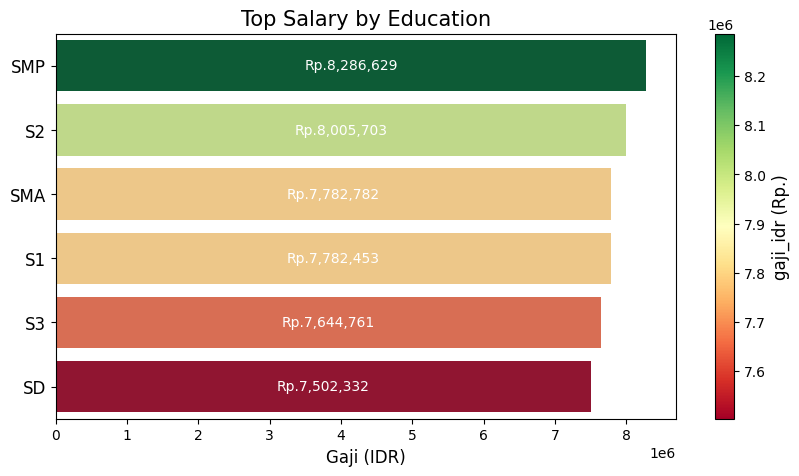

In [137]:
''' 
Membuat sort list dan visualisasi gaji berdasarkan pendidikan
'''
median_salary_by_education = dataset.groupby('pendidikan')['gaji_idr'].median().reset_index().sort_values(by='gaji_idr', ascending=False)
median_salary_by_education.columns = ['pendidikan', 'gaji_idr']
print(median_salary_by_education.head(10)) 
plot_barplot(
    data=median_salary_by_education,
    x_col="gaji_idr",
    y_col="pendidikan", 
    title="Top Salary by Education",
    format_number="Rp.",
    x_label="Gaji (IDR)",
)

In [138]:
''' 
insight: Gaji tertinggi adalah untuk pendidikan adalah sesorang yang SMP dan gaji terendah SD, 
bahkan gaji dari kelompok S3 yang merupakan tingkat pendidikan tertinggi di data yang disediakan menjadi 2 terendah

Terlihat pada data di atas bahwa hubungan antara pendidikan dan gaji tidak selalu berbanding lurus.
ini menunjukkan bahwa pendidikan tidak menjadi faktor penentu utama dalam menentukan gaji seseorang menurut data yang disediakan.
'''

' \ninsight: Gaji tertinggi adalah untuk pendidikan adalah sesorang yang SMP dan gaji terendah SD, \nbahkan gaji dari kelompok S3 yang merupakan tingkat pendidikan tertinggi di data yang disediakan menjadi 2 terendah\n\nTerlihat pada data di atas bahwa hubungan antara pendidikan dan gaji tidak selalu berbanding lurus.\nini menunjukkan bahwa pendidikan tidak menjadi faktor penentu utama dalam menentukan gaji seseorang menurut data yang disediakan.\n'

### 2.1 Sektor Pekerjaan Apa yang paling diminati?

                 pekerjaan  jumlah
2           Pegawai swasta    2900
1                      PNS    2874
0                Freelance    1052
3             Pengangguran     304
4  Tidak ingin memberitahu     140


/tmp/ipykernel_51274/2438731557.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


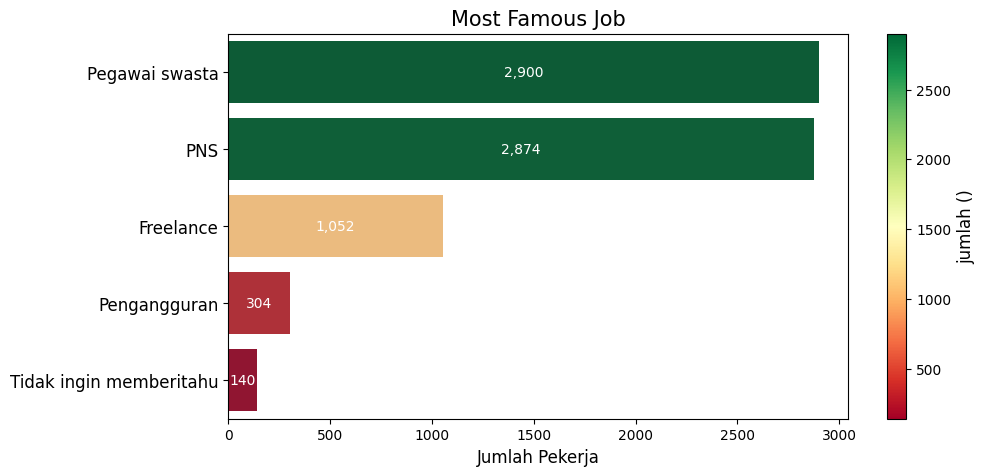

In [139]:
''' 
Membuat sort list dan visualisasi banyak orang dalam suatu role pekerjaan
'''
count_job = dataset.groupby('pekerjaan').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_job)
plot_barplot(
    data=count_job,
    x_col="jumlah",
    y_col="pekerjaan", 
    title="Most Famous Job",
    format_number="",
    x_label="Jumlah Pekerja",
)


In [140]:
''' 
insight:

Menurut tampilan dan list di atas, sektor yang paling banyak memiliki pekerja adalah pegawai swasta dan pegawai negeri
dan sektor yang memiliki pekerja paling sedikit adalah pekerjaan yang tidak diketahui diikuti oleh pengangguran
sedangkan Freelance pada diposisi ketiga dari bawah
'''

' \ninsight:\n\nMenurut tampilan dan list di atas, sektor yang paling banyak memiliki pekerja adalah pegawai swasta dan pegawai negeri\ndan sektor yang memiliki pekerja paling sedikit adalah pekerjaan yang tidak diketahui diikuti oleh pengangguran\nsedangkan Freelance pada diposisi ketiga dari bawah\n'

### 2.2 Jenis kelamin mana yang paling banyak dalam sektor pekerja?

  jenis_kelamin  jumlah
0     Laki-laki    4751
1     Perempuan    2215


/tmp/ipykernel_51274/2438731557.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


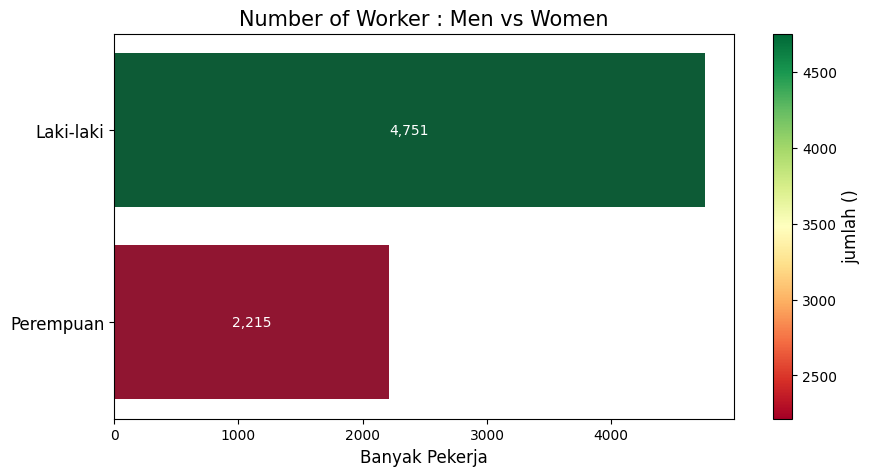

In [141]:
''' 
Membuat sort list dan visualisasi banyak orang yang bekerja berdasarkan jenis kelamin
'''
count_gender = dataset_worker.groupby('jenis_kelamin').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_gender)  
plot_barplot(
    data=count_gender,
    x_col="jumlah",
    y_col="jenis_kelamin", 
    title="Number of Worker : Men vs Women",
    format_number="",
    x_label="Banyak Pekerja",
)

In [142]:
''' 
Insight:

menurut list dan visualisasi di atas dapat dilihat bahwa pekerja laki-laki lebih banyak dibandingkan perempuan,
bahkan jumlahnya lebih dari dua kali lipat dari perempuan.
'''

' \nInsight:\n\nmenurut list dan visualisasi di atas dapat dilihat bahwa pekerja laki-laki lebih banyak dibandingkan perempuan,\nbahkan jumlahnya lebih dari dua kali lipat dari perempuan.\n'

  jenis_kelamin  jumlah
0     Laki-laki     221
1     Perempuan      83


/tmp/ipykernel_51274/2438731557.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


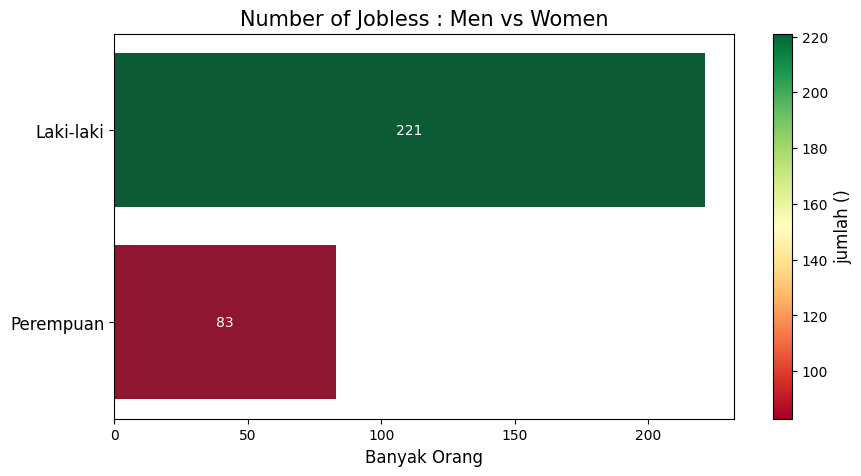

In [143]:
''' 
Membuat sort list dan visualisasi banyak pengangguran berdasarkan jenis kelamin
'''
count_gender = dataset_no_worker.groupby('jenis_kelamin').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_gender)  
plot_barplot(
    data=count_gender,
    x_col="jumlah",
    y_col="jenis_kelamin", 
    title="Number of Jobless : Men vs Women",
    format_number="",
    x_label="Banyak Orang",
)

In [144]:
''' 
Insight:

Bersadarkan data di atas pengangguran terbanyak ada pada laki-laki, dan paling sedikit adalah perempuan.
Karena secara posisi sama pekerja maupun pengangguran terbanyak laki - laki lalu diikuti oleh perempuan 
dapat diambil kesimpulan bahwa laki - laki lebih banyak yang bekerja dibandingkan perempuan menurut data yang disediakan.
'''

' \nInsight:\n\nBersadarkan data di atas pengangguran terbanyak ada pada laki-laki, dan paling sedikit adalah perempuan.\nKarena secara posisi sama pekerja maupun pengangguran terbanyak laki - laki lalu diikuti oleh perempuan \ndapat diambil kesimpulan bahwa laki - laki lebih banyak yang bekerja dibandingkan perempuan menurut data yang disediakan.\n'

### 2.3 Umur mana yang memiliki jumlah orang paling banyak pekerja dan pengangguran?

    umur  jumlah
28    37     328
32    41     294
29    38     283
26    35     278
31    40     273
    umur  jumlah
60    69       9
5     14       7
4     13       6
58    67       5
59    68       5
3     12       5
57    66       5
62    71       3
1     10       2
61    70       2
0      8       1
63    73       1
64    74       1
65    75       1
66    77       1


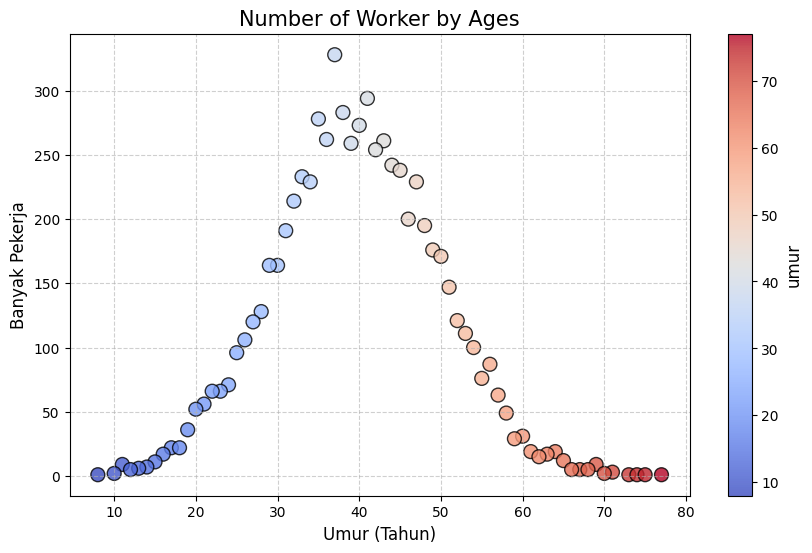

In [145]:
''' 
Membuat sort list dan visualisasi banyak pekerja berdasarkan umur
'''

count_ages = dataset_worker.groupby('umur').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_ages.head(5)) 
print(count_ages.tail(15))

plot_scatter(
    data=count_ages,
    x_col="umur",
    y_col="jumlah",
    title="Number of Worker by Ages",
    x_label="Umur (Tahun)",
    y_label="Banyak Pekerja"
)

In [146]:
''' 
Insight:

Untuk jumlah pekerja paling banyak yaitu pada umur 37 tahun diikuti 41, 38, 35, 40 Tahun 
Untuk jumlah pekerja paling sedikit yaitu pada umur 77 tahun diikuti 75, 74, 73, 8 Tahun

Berdasarkan data di atas, terlihat bahwa jumlah pekerja paling banyak berada pada umur antara 35 - 41 tahun, 
Visualisasi ini termasuk rapi dan mudah dibaca, sehingga dapat dengan mudah diinterpretasikan bahwa jumlah pekerja
terjadi peningkatan pada umur produktif hingga pada puncaknya yaitu antara 35 - 41 tahun, lalu terjadi penurunan setelah melewati fase umur tersebut.
'''

' \nInsight:\n\nUntuk jumlah pekerja paling banyak yaitu pada umur 37 tahun diikuti 41, 38, 35, 40 Tahun \nUntuk jumlah pekerja paling sedikit yaitu pada umur 77 tahun diikuti 75, 74, 73, 8 Tahun\n\nBerdasarkan data di atas, terlihat bahwa jumlah pekerja paling banyak berada pada umur antara 35 - 41 tahun, \nVisualisasi ini termasuk rapi dan mudah dibaca, sehingga dapat dengan mudah diinterpretasikan bahwa jumlah pekerja\nterjadi peningkatan pada umur produktif hingga pada puncaknya yaitu antara 35 - 41 tahun, lalu terjadi penurunan setelah melewati fase umur tersebut.\n'

    umur  jumlah
29    44      15
21    36      15
20    35      15
31    46      14
19    34      13
    umur  jumlah
37    52       2
42    58       2
5     20       1
0     11       1
4     19       1
1     12       1
2     16       1
43    59       1
44    61       1
45    62       1
46    63       1
47    64       1
48    65       1
49    66       1
50    71       1


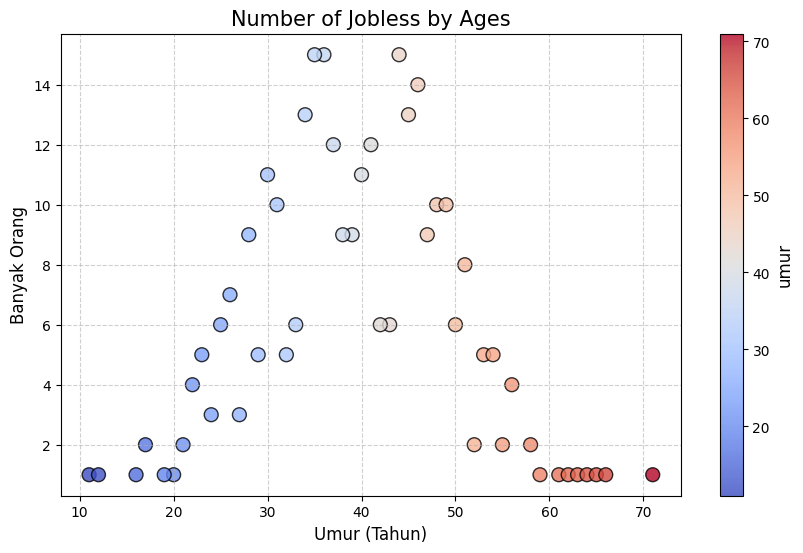

In [147]:
''' 
Membuat sort list dan visualisasi banyak pengangguran berdasarkan umur
'''

count_ages = dataset_no_worker.groupby('umur').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_ages.head(5))
print(count_ages.tail(15))

plot_scatter(
    data=count_ages,
    x_col="umur",
    y_col="jumlah",
    title="Number of Jobless by Ages",
    x_label="Umur (Tahun)",
    y_label="Banyak Orang"
)

In [148]:
''' 
Insight: 

Pada data di atas terlihat bahwa data memiliki pola tren yang hampir sama pada visualisasi pekerja berdasarkan umur, 
yang mana jumlah pengangguran terbanyak ada pada umur 44 Tahub lalu di umur 36 Tahun, dan yang ketingga adalah 35 Tahun
dan jumlah pengangguran paling sedikit ada pada umur 71, 66, 65, 64, 63, 62, 61, 59, 16, 12, 19, 11, 20 yang mana memiliki posisi seimbang untuk banyak orangnya
'''

' \nInsight: \n\nPada data di atas terlihat bahwa data memiliki pola tren yang hampir sama pada visualisasi pekerja berdasarkan umur, \nyang mana jumlah pengangguran terbanyak ada pada umur 44 Tahub lalu di umur 36 Tahun, dan yang ketingga adalah 35 Tahun\ndan jumlah pengangguran paling sedikit ada pada umur 71, 66, 65, 64, 63, 62, 61, 59, 16, 12, 19, 11, 20 yang mana memiliki posisi seimbang untuk banyak orangnya\n'

### 2.4 Pendidikan apa yang paling banyak dimiliki para pekerja dan pengangguran?

  pendidikan  jumlah
0         S1    3829
4        SMA    1770
1         S2     523
5        SMP     496
3         SD     206
2         S3     142


/tmp/ipykernel_51274/2438731557.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


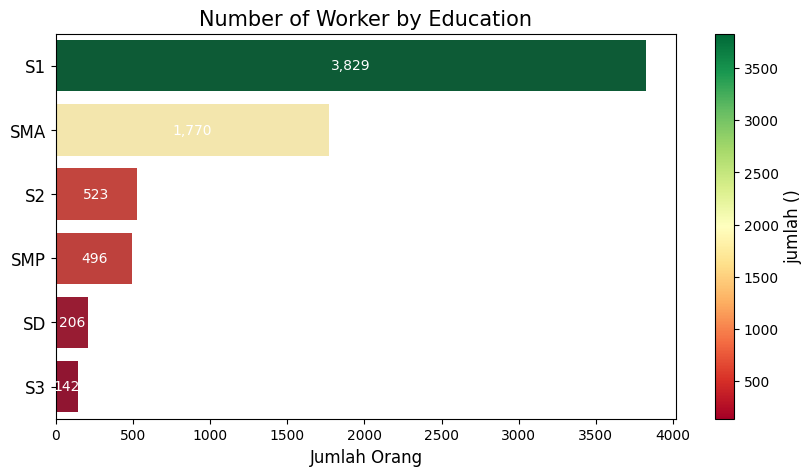

In [149]:
''' 
Membuat sort list dan visualisasi banyak Pekerja berdasarkan Pendidikan
'''

count_education = dataset_worker.groupby('pendidikan').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_education)  
plot_barplot(
    data=count_education,
    x_col="jumlah",
    y_col="pendidikan", 
    title="Number of Worker by Education",
    format_number="",
    x_label="Jumlah Orang",
)

In [150]:
'''
Insight: 

Terlihat bahwa pekerja dengan pendidikan terakhir S1 memiliki jumlah terbanyak lalu diikuti dengan para pekerja yang memiliki pendidikan terakhir SMA
untuk pekerja paling sedikit adalah mereka yang memiliki pendidikan terakhir S3 lalu diikuti oleh mereka yang memiliki pendidikan terakhir SD
'''

'\nInsight: \n\nTerlihat bahwa pekerja dengan pendidikan terakhir S1 memiliki jumlah terbanyak lalu diikuti dengan para pekerja yang memiliki pendidikan terakhir SMA\nuntuk pekerja paling sedikit adalah mereka yang memiliki pendidikan terakhir S3 lalu diikuti oleh mereka yang memiliki pendidikan terakhir SD\n'

  pendidikan  jumlah
0         S1     170
4        SMA      64
5        SMP      27
1         S2      24
3         SD      12
2         S3       7


/tmp/ipykernel_51274/2438731557.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


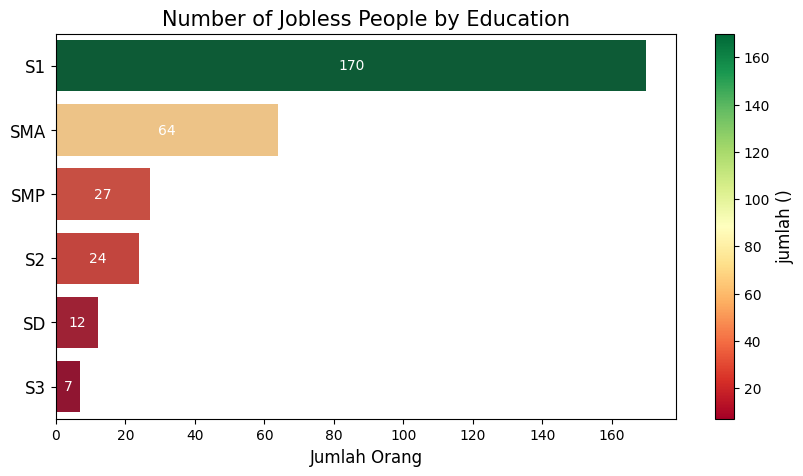

In [151]:
''' 
Membuat sort list dan visualisasi banyak Pengangguran berdasarkan Pendidikan
'''

count_education = dataset_no_worker.groupby('pendidikan').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_education)  
plot_barplot(
    data=count_education,
    x_col="jumlah",
    y_col="pendidikan", 
    title="Number of Jobless People by Education",
    format_number="",
    x_label="Jumlah Orang",
)

In [152]:
'''
Insight: 

Terlihat bahwa pengangguran dengan pendidikan terakhir S1 memiliki jumlah terbanyak lalu diikuti dengan para pekerja yang memiliki pendidikan terakhir SMA
untuk pekerja paling sedikit adalah mereka yang memiliki pendidikan terakhir S3 lalu diikuti oleh mereka yang memiliki pendidikan terakhir SD
'''

'\nInsight: \n\nTerlihat bahwa pengangguran dengan pendidikan terakhir S1 memiliki jumlah terbanyak lalu diikuti dengan para pekerja yang memiliki pendidikan terakhir SMA\nuntuk pekerja paling sedikit adalah mereka yang memiliki pendidikan terakhir S3 lalu diikuti oleh mereka yang memiliki pendidikan terakhir SD\n'

### 3. Tingkat Stress

In [153]:
''' 
Membuat fungsi untuk menghitung rasio stres berdasarkan kolom tertentu, 
Membuat kode tampak lebih efesien
'''
def calculate_stress_ratio(data, col=""):
    stress_ratio = data.groupby(col)['ever_stress'].mean().reset_index()
    stress_ratio = stress_ratio.rename(columns={'ever_stress': 'stress_ratio(%)'})
    stress_ratio = stress_ratio.sort_values(by='stress_ratio(%)', ascending=False)
    stress_ratio['stress_ratio(%)'] = (stress_ratio['stress_ratio(%)'] * 100).round(2)  # Mengubah ke persentase
    return stress_ratio


### 3.1 Pekerjaan apa yang memiliki tingkat stress paling tinggi dan paling rendah?

                 pekerjaan  stress_ratio(%)
4  Tidak ingin memberitahu            72.86
3             Pengangguran            70.39
1                      PNS            70.39
0                Freelance            69.68
2           Pegawai swasta            69.62


/tmp/ipykernel_51274/2438731557.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


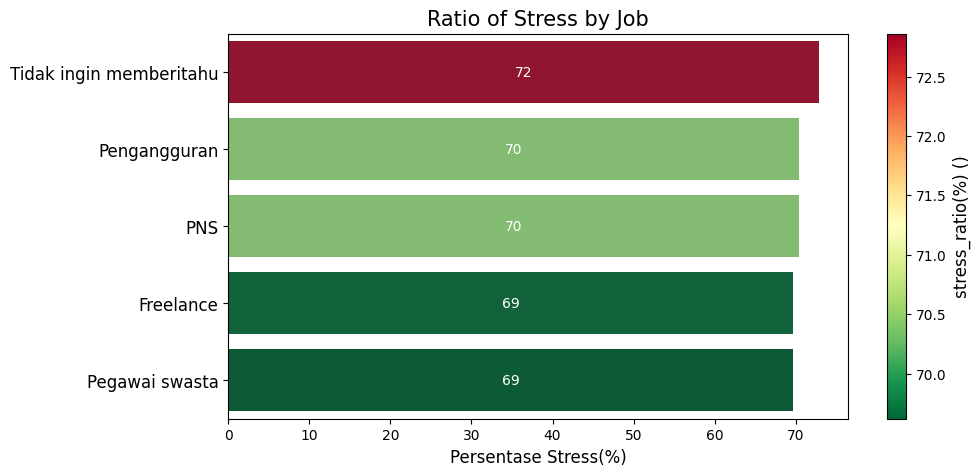

In [154]:
''' 
Membuat sort list dan visualisasi rasio stres berdasarkan pekerjaan
'''

stress_ratio_by_job = calculate_stress_ratio(dataset, col="pekerjaan")
print(stress_ratio_by_job)
plot_barplot(
    data=stress_ratio_by_job,
    x_col="stress_ratio(%)",
    y_col="pekerjaan", 
    title="Ratio of Stress by Job",
    format_number="",
    x_label="Persentase Stress(%)",
    colour_bar_set="2"
)

In [155]:
''' 
Insight: 

Terlihat bahwa pekerja dengan pekerjaan yang paling banyak mengalami stres adalah pekerjaan yang tidak diketahui, lalu diikuti oleh pengangguran dan PNS 
Lalu untukk pekerjaan yang paling sedikit mengalami stres adalah pekerja yang bekerja di sektor Pegawai Swasta lalu diikuti Freelance
'''

' \nInsight: \n\nTerlihat bahwa pekerja dengan pekerjaan yang paling banyak mengalami stres adalah pekerjaan yang tidak diketahui, lalu diikuti oleh pengangguran dan PNS \nLalu untukk pekerjaan yang paling sedikit mengalami stres adalah pekerja yang bekerja di sektor Pegawai Swasta lalu diikuti Freelance\n'

### 3.2 Apakah tingkat stress laki - laki sama dengan perempuan?

  jenis_kelamin  stress_ratio(%)
1     Perempuan            71.15
0     Laki-laki            69.51


/tmp/ipykernel_51274/2438731557.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


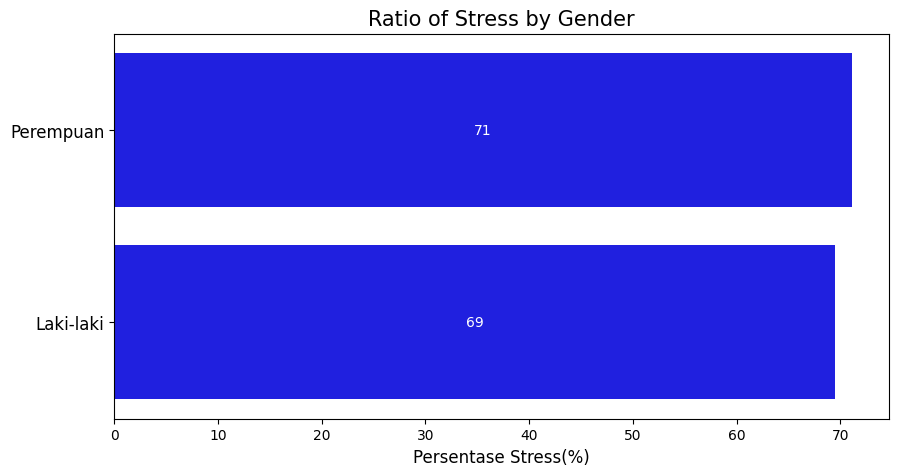

In [156]:
''' 
Membuat sort list dan visualisasi rasio stres berdasarkan jenis kelamin
'''

stress_ratio_by_gender = calculate_stress_ratio(dataset, col="jenis_kelamin")
print(stress_ratio_by_gender)
plot_barplot(
    data=stress_ratio_by_gender,
    x_col="stress_ratio(%)",
    y_col="jenis_kelamin", 
    title="Ratio of Stress by Gender",
    format_number="",
    x_label="Persentase Stress(%)",
    colour_bar_set="3"
)

In [157]:
''' 
Pada list dan gambar di atas dapat terlihat bahwa perempuan lebih banyak mengalami stres dibandingkan laki-laki secara sekilas,
tapi dibutuhan perbandingan nilai P_Score dengan Alpha yang mana sebesar 5% untuk mengetahui apakah ada perbedaan signifikan antara laki-laki dan perempuan, 
maka dari itu kita membuat 2 hipotesis sebagai berikut:
H0: Stres laki-laki sama dengan perempuan. Tidak ada perbedaan signifikan.
H1: Stres laki-laki tidak sama dengan perempuan. Ada perbedaan signifikan.
'''

' \nPada list dan gambar di atas dapat terlihat bahwa perempuan lebih banyak mengalami stres dibandingkan laki-laki secara sekilas,\ntapi dibutuhan perbandingan nilai P_Score dengan Alpha yang mana sebesar 5% untuk mengetahui apakah ada perbedaan signifikan antara laki-laki dan perempuan, \nmaka dari itu kita membuat 2 hipotesis sebagai berikut:\nH0: Stres laki-laki sama dengan perempuan. Tidak ada perbedaan signifikan.\nH1: Stres laki-laki tidak sama dengan perempuan. Ada perbedaan signifikan.\n'

In [158]:
gaji_laki2 = dataset[dataset.jenis_kelamin == "Laki-laki"][["jenis_kelamin","ever_stress"]]
gaji_perempuan = dataset[dataset.jenis_kelamin == "Perempuan"][["jenis_kelamin","ever_stress"]]

mean_laki2 = gaji_laki2['ever_stress'].mean()
mean_perempuan = gaji_perempuan['ever_stress'].mean()

t_statistic, p_value = stats.ttest_ind(a=gaji_laki2['ever_stress'].values, b=gaji_perempuan['ever_stress'].values, equal_var=False, alternative='greater')

alpha = 0.05

if p_value < alpha:
    print("\nKeputusan: P-value lebih kecil dari alpha. Tolak Hipotesis Nol. Stress level laki-laki adalah sama dengan perempuan. Tidak ada perbedaan signifikan.")
else:
    print("\nKeputusan: P-value lebih besar dari alpha. Gagal menolak Hipotesis Nol. Stress level laki-laki tidak sama dengan perempuan. Ada perbedaan signifikan.")


Keputusan: P-value lebih besar dari alpha. Gagal menolak Hipotesis Nol. Stress level laki-laki tidak sama dengan perempuan. Ada perbedaan signifikan.


In [159]:
''' 
Insight : 

Terilihat bahwa laki-laki memiliki tingkat stres yang lebih rendah dibandingkan perempuan karena P-value lebih besar dari alpha. 
Gagal menolak Hipotesis Nol. Stress level laki-laki tidak sama dengan perempuan. Ada perbedaan signifikan.
'''

' \nInsight : \n\nTerilihat bahwa laki-laki memiliki tingkat stres yang lebih rendah dibandingkan perempuan karena P-value lebih besar dari alpha. \nGagal menolak Hipotesis Nol. Stress level laki-laki tidak sama dengan perempuan. Ada perbedaan signifikan.\n'

### 3.3 Umur berapa yang memiliki tingkat stress paling tinggi dan paling rendah?

    umur  stress_ratio(%)
0      8           100.00
1     10           100.00
4     13           100.00
61    70           100.00
64    74           100.00
66    77           100.00
5     14            85.71
55    64            85.00
2     11            80.00
58    67            80.00 
     umur  stress_ratio(%)
34    43            65.17
45    54            64.76
40    49            64.52
43    52            64.23
41    50            62.71
53    62            43.75
59    68            40.00
57    66            33.33
63    73             0.00
65    75             0.00


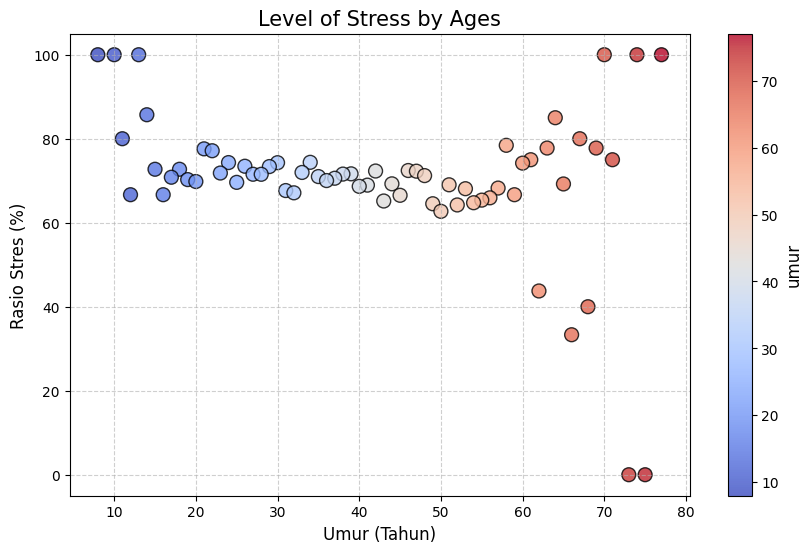

In [160]:
''' 
Membuat sort list dan visualisasi rasio stres berdasarkan umur
'''
stress_ratio_by_ages = calculate_stress_ratio(dataset, col="umur")
print(stress_ratio_by_ages.head(10), "\n", 
    stress_ratio_by_ages.tail(10))
plot_scatter(
    data=stress_ratio_by_ages,
    x_col="umur",
    y_col="stress_ratio(%)",
    title="Level of Stress by Ages",
    x_label="Umur (Tahun)",
    y_label="Rasio Stres (%)"
)

In [161]:
''' 
Insight: 

Terlihat bahwa tingkat stress tertinggi ada pada orang yang berumur : 77, 74, 70, 13, 10, 8 Tahun
dan terendah ada pada orang yang berumur : 75 dan 73 Tahun

Dapat diambil kesimpulan bahwa tingkat stres tidak berbanding lurus dengan umur
'''

' \nInsight: \n\nTerlihat bahwa tingkat stress tertinggi ada pada orang yang berumur : 77, 74, 70, 13, 10, 8 Tahun\ndan terendah ada pada orang yang berumur : 75 dan 73 Tahun\n\nDapat diambil kesimpulan bahwa tingkat stres tidak berbanding lurus dengan umur\n'

### 3.4 Apakah tingkat stress perokok lebih rendah daripada yang non-perokok?

   is_merokok  stress_ratio(%) status_merokok
1           1            70.50        Merokok
0           0            69.56  Tidak Merokok


/tmp/ipykernel_51274/2438731557.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


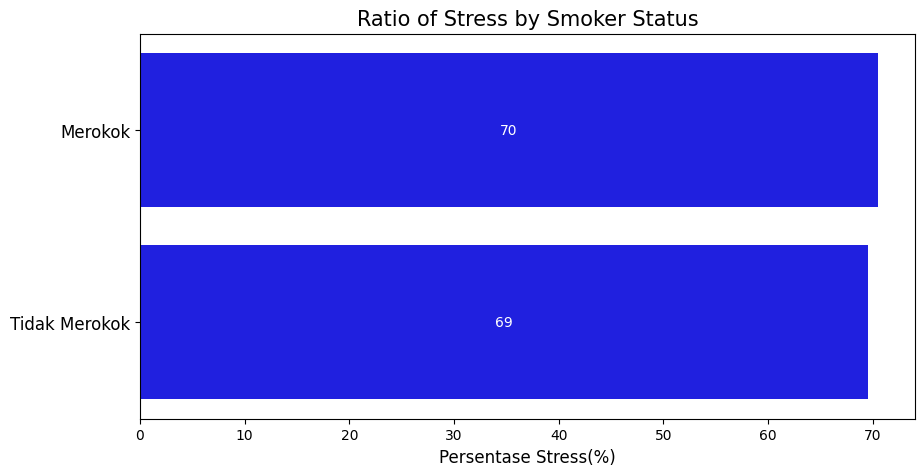

In [162]:
''' 
Membuat sort list dan visualisasi rasio stres berdasarkan status merokok
'''
stress_ratio_by_ciggerates = calculate_stress_ratio(dataset, col="is_merokok")
stress_ratio_by_ciggerates['status_merokok'] = stress_ratio_by_ciggerates['is_merokok'].replace({0: 'Tidak Merokok', 1: 'Merokok'})
print(stress_ratio_by_ciggerates)
plot_barplot(
    data=stress_ratio_by_ciggerates,
    x_col="stress_ratio(%)",
    y_col="status_merokok", 
    title="Ratio of Stress by Smoker Status",
    format_number="",
    x_label="Persentase Stress(%)",
    colour_bar_set="3"
)

In [163]:
''' 
Pada list dan gambar di atas dapat terlihat bahwa perokok memiliki persentase stress yang lebih tinggi sedikit daripada yang tidak merokok,
tapi dibutuhan perbandingan nilai P_Score dengan Alpha yang mana sebesar 5% untuk mengetahui apakah ada perbedaan signifikan antara tingkat stress perokok dan non-perokok, 
maka dari itu kita membuat 2 hipotesis sebagai berikut:
H0: Stres Perokok sama dengan Non-Perokok. Tidak ada perbedaan signifikan.
H1: Stres Perokok tidak sama dengan Non-Perokok. Ada perbedaan signifikan.
'''

' \nPada list dan gambar di atas dapat terlihat bahwa perokok memiliki persentase stress yang lebih tinggi sedikit daripada yang tidak merokok,\ntapi dibutuhan perbandingan nilai P_Score dengan Alpha yang mana sebesar 5% untuk mengetahui apakah ada perbedaan signifikan antara tingkat stress perokok dan non-perokok, \nmaka dari itu kita membuat 2 hipotesis sebagai berikut:\nH0: Stres Perokok sama dengan Non-Perokok. Tidak ada perbedaan signifikan.\nH1: Stres Perokok tidak sama dengan Non-Perokok. Ada perbedaan signifikan.\n'

In [164]:
stress_perokok = dataset[dataset.is_merokok == 1][["is_merokok","ever_stress"]]
stress_non_perokok = dataset[dataset.is_merokok == 0][["is_merokok","ever_stress"]]

mean_stress_perokok = stress_perokok['ever_stress'].mean()
mean_stress_non_perokok = stress_non_perokok['ever_stress'].mean()

t_statistic, p_value = stats.ttest_ind(a=stress_perokok['ever_stress'].values, b=stress_non_perokok['ever_stress'].values, equal_var=False, alternative='greater')

alpha = 0.05

if p_value < alpha:
    print("\nKeputusan: P-value lebih kecil dari alpha. Tolak Hipotesis Nol. Stress level perokok adalah sama dengan non-perokok. Tidak ada perbedaan signifikan.")
else:
    print("\nKeputusan: P-value lebih besar dari alpha. Gagal menolak Hipotesis Nol. Stress perokok tidak sama dengan non-perokok. Ada perbedaan signifikan.")


Keputusan: P-value lebih besar dari alpha. Gagal menolak Hipotesis Nol. Stress perokok tidak sama dengan non-perokok. Ada perbedaan signifikan.


In [165]:
''' 
Insight : 

Dilihat dari hasil di atas, terlihat bahwa perokok memiliki tingkat stress yang lebih tinggi dibandingkan non-perokok karena P-value lebih besar dari alpha.
'''

' \nInsight : \n\nDilihat dari hasil di atas, terlihat bahwa perokok memiliki tingkat stress yang lebih tinggi dibandingkan non-perokok karena P-value lebih besar dari alpha.\n'

### 3.5 Bagaimana Hubungan Tingkat Gaji dan Tingkat Stress?

      gaji_usd  stress_ratio(%)
15       147.0            100.0
1150    3053.0            100.0
0         92.0            100.0
1        100.0            100.0
2        104.0            100.0
3        118.0            100.0
1148    2658.0            100.0
5        127.0            100.0
6        129.0            100.0
7        130.0            100.0
8        132.0            100.0
9        134.0            100.0
10       137.0            100.0
1138    2051.0            100.0
1139    2071.0            100.0
1141    2186.0            100.0
1142    2275.0            100.0
1143    2311.0            100.0
1145    2366.0            100.0
1146    2484.0            100.0
1147    2624.0            100.0
12       142.0            100.0
575      712.0            100.0
578      715.0            100.0
579      716.0            100.0
583      720.0            100.0
45       180.0            100.0
46       181.0            100.0
48       183.0            100.0
50       185.0            100.0
53      

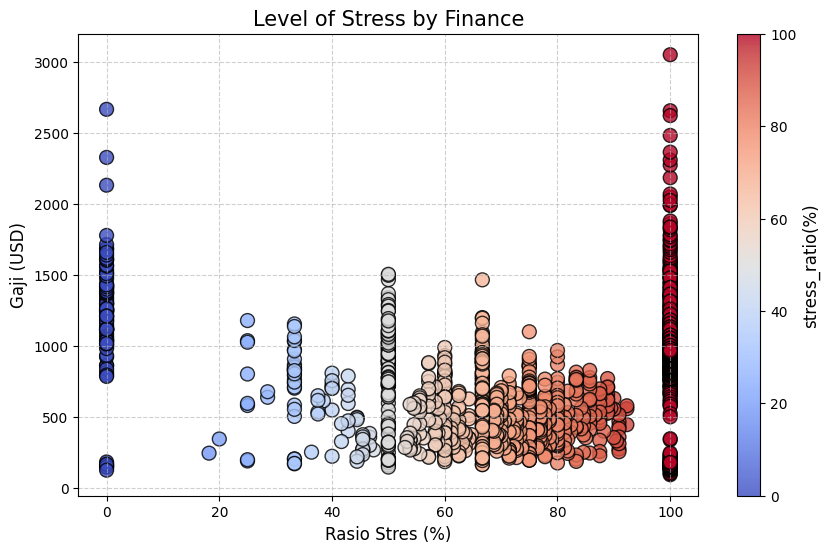

In [166]:
''' 
Membuat sort list dan visualisasi rasio stres berdasarkan gaji
'''
stress_ratio_by_finance = calculate_stress_ratio(dataset, col="gaji_usd")

print(stress_ratio_by_finance.head(50), "\n",stress_ratio_by_finance.tail(50))

plot_scatter(
    data=stress_ratio_by_finance,
    x_col="stress_ratio(%)",
    y_col="gaji_usd",
    title="Level of Stress by Finance",
    x_label="Rasio Stres (%)",
    y_label="Gaji (USD)"
)

In [167]:
''' 
Insight: 

Terlihat bahwa secara tampilan visual banyak kelompok gaji yang berada pada ambang stress, tapi untuk melihat data secara detail
diperlukan klasifikasi lebih lanjut yang mana membagi kelompok gaji dan stress ini menjadi 4 macam yaitu : 
1. Gaji Rendah - Stres Rendah
2. Gaji Tinggi - Stres Rendah
3. Gaji Tinggi - Stres Tinggi
4. Gaji Rendah - Stres Tinggi   
'''

' \nInsight: \n\nTerlihat bahwa secara tampilan visual banyak kelompok gaji yang berada pada ambang stress, tapi untuk melihat data secara detail\ndiperlukan klasifikasi lebih lanjut yang mana membagi kelompok gaji dan stress ini menjadi 4 macam yaitu : \n1. Gaji Rendah - Stres Rendah\n2. Gaji Tinggi - Stres Rendah\n3. Gaji Tinggi - Stres Tinggi\n4. Gaji Rendah - Stres Tinggi   \n'

status_stress
low paid high stress     491
high paid high stress    395
high paid low stress     106
low paid low stress       56
Name: count, dtype: int64


/tmp/ipykernel_51274/2438731557.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


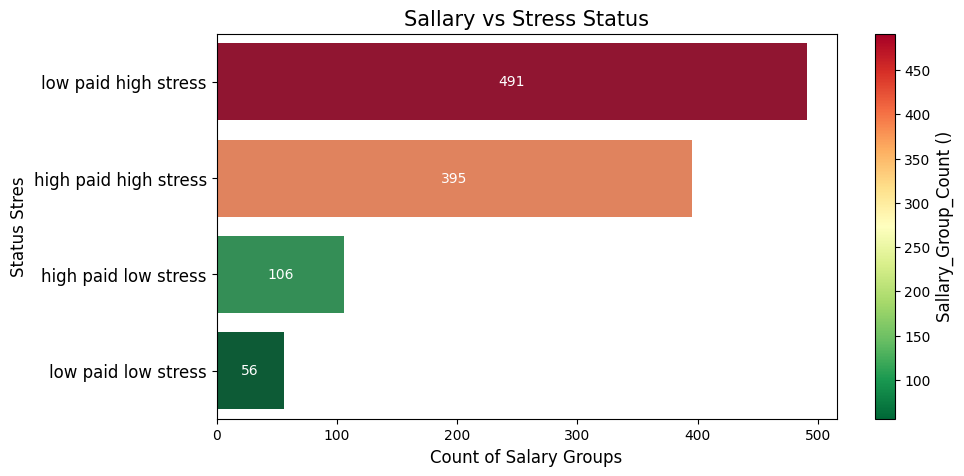

In [168]:
''' 
Melakukan klasifikasi berdasarkan median gaji untuk menentukan status stres
yang mana median gaji ini digunakan untuk membagi kelompok gaji menjadi 2 bagian yaitu gaji rendah dan tinggi
sedangkan status stres ini digunakan untuk membagi kelompok stres menjadi 2 bagian yaitu stres rendah (stress: <50) dan tinggi (stress: >50)
'''

median_gaji_usd = stress_ratio_by_finance['gaji_usd'].median()

def determine_stress_status(row):
    if row['stress_ratio(%)'] < 50 and row['gaji_usd'] < median_gaji_usd:
        return 'low paid low stress'
    elif row['stress_ratio(%)'] < 50 and row['gaji_usd'] > median_gaji_usd:
        return 'high paid low stress'
    elif row['stress_ratio(%)'] > 50 and row['gaji_usd'] > median_gaji_usd:
        return 'high paid high stress'
    elif row['stress_ratio(%)'] > 50 and row['gaji_usd'] < median_gaji_usd:
        return 'low paid high stress'

stress_ratio_by_finance['status_stress'] = stress_ratio_by_finance.apply(determine_stress_status, axis=1)
print(stress_ratio_by_finance['status_stress'].value_counts())

# Menghitung value_counts dan mengonversi ke DataFrame
status_stress_counts = stress_ratio_by_finance['status_stress'].value_counts().reset_index()
status_stress_counts.columns = ['status_stress', 'Sallary_Group_Count']

# Membuat barplot berdasarkan value_counts
plot_barplot(
    data=status_stress_counts,
    y_col="status_stress",
    x_col="Sallary_Group_Count",
    title="Sallary vs Stress Status",
    format_number="",
    x_label="Count of Salary Groups",
    y_label="Status Stres",
    colour_bar_set="2"  # Mode warna sesuai permintaan
)

In [169]:
''' 
Insight: 

Terlihat bahwa kelompok gaji rendah dengan stres tinggi memiliki jumlah terbanyak, lalu diikuti oleh kelompok gaji tinggi dengan stres tinggi,
dan untuk terendah adalah kelompok gaji rendah dengan stres rendah, 

ini menunjukkan bahwa secara data masing banyak orang yang memiliki gaji rendah dan mengalami stres tinggi,
Dan ini menunjukkan tingkat gaji tidak berbanding lurus dengan stress seseorang, 

karena tiap kebahagiaan seseorang itu relatif tergantung dari kondisi masing-masing individu, 
maka dari itu tentukanlah standar kebahagiaan masing-masing, semakin tinggi gaji seseorang belum tentu membuatnya bahagia,
Bahagialah dengan keadaan yang ada, karena kebahagiaan itu tidak diukur dari seberapa banyak uang yang kita miliki, 
tapi bagaimana kita menggunakan uang tersebut untuk kebahagiaan kita dan orang-orang di sekitar kita.
'''

' \nInsight: \n\nTerlihat bahwa kelompok gaji rendah dengan stres tinggi memiliki jumlah terbanyak, lalu diikuti oleh kelompok gaji tinggi dengan stres tinggi,\ndan untuk terendah adalah kelompok gaji rendah dengan stres rendah, \n\nini menunjukkan bahwa secara data masing banyak orang yang memiliki gaji rendah dan mengalami stres tinggi,\nDan ini menunjukkan tingkat gaji tidak berbanding lurus dengan stress seseorang, \n\nkarena tiap kebahagiaan seseorang itu relatif tergantung dari kondisi masing-masing individu, \nmaka dari itu tentukanlah standar kebahagiaan masing-masing, semakin tinggi gaji seseorang belum tentu membuatnya bahagia,\nBahagialah dengan keadaan yang ada, karena kebahagiaan itu tidak diukur dari seberapa banyak uang yang kita miliki, \ntapi bagaimana kita menggunakan uang tersebut untuk kebahagiaan kita dan orang-orang di sekitar kita.\n'